<a href="https://colab.research.google.com/github/maurorodas/webScrScienti/blob/main/webSCR_MinCien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install mechanicalsoup
import mechanicalsoup
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

browser = mechanicalsoup.Browser()
browser.keep_alive = False

url = "https://scienti.minciencias.gov.co/ciencia-war/busquedaAvanzadaGrupos.do?integrantes=&proyectos=&annoCreacion=&depInst=&status=&progNacional=&nmeLider=&codIdGrupo=&progNacionalSec=&buscar=buscar&nmeGrupo=&areaConocimiento=&ciuInst=&productos=&genLider=&nmeInstitucion=%22Universidad%20de%20Caldas%22&filtrar=&maxRows=100&gruposAvanzada_tr_=true&gruposAvanzada_p_=1&gruposAvanzada_mr_=100"

page = browser.get(url, verify=False)
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table', id='gruposAvanzada')
rows = []
data = []


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
for group_data in table.find_all('tbody', {'class': 'tbody'}):
  rows = group_data.find_all('tr')
  for row in rows:
    groupCode = row.find_all('td')[1].text
    groupName = row.find_all('td')[2].text
    groupURL = row.find_all('td')[2].a["href"]
    
    # browserGroup= mechanicalsoup.Browser()
    # browserGroup.keep_alive = False
    # pageGroup = browserGroup.get(groupURL, verify=False)
    # soupGroup = BeautifulSoup(pageGroup.text, 'lxml')
    # filename = groupCode + ".html"
    # f = open(filename, "w")
    # f.write(soupGroup.prettify( formatter="html" ))
    # f.close()
    
    groupLider = row.find_all('td')[3].text
    groupLiderURL = row.find_all('td')[3].a["href"]
    groupCat_temp = row.find_all('td')[6].text
    groupConv_temp = row.find_all('td')[7].text
    
    if "CATEGORIA" in groupCat_temp:
      cat = groupCat_temp.split()
      groupCat = cat[1]
    else:
      groupCat = groupCat_temp
    
    if "CONVOCATORIA" in groupConv_temp:
      conv = groupConv_temp.split()
      groupConv = conv[3]
    else:
      groupConv = "NA"
    
    data.append(
        {
            'Código': groupCode,
            'Nombre': groupName,
            'grupo_URL': groupURL,
            'Lider': groupLider,
            'lider_URL': groupLiderURL,
            'Categoría': groupCat,
            'Año_Convocatoria': groupConv
        }
    )
df = pd.DataFrame(data)
df    

,Código,Nombre,grupo_URL,Lider,lider_URL,Categoría,Año_Convocatoria
0,COL0028883,IDACANZAS: PREVIENDO LAS MUDANZAS DE LOS TIEMPOS,https://scienti.minciencias.gov.co/gruplac/jsp...,CARLOS EDUARDO ROJAS ROJAS,https://scienti.minciencias.gov.co/cvlac/visua...,C,2018
1,COL0029577,BIOLOGIA DE LA PRODUCCION PECUARIA,https://scienti.minciencias.gov.co/gruplac/jsp...,JULIAN ALONSO VALENCIA GIRALDO,https://scienti.minciencias.gov.co/cvlac/visua...,A,2021
2,COL0030489,GITIR: GRUPO DE INVESTIGACION EN TECNOLOGIAS D...,https://scienti.minciencias.gov.co/gruplac/jsp...,CARLOS ALBERTO RUIZ VILLA,https://scienti.minciencias.gov.co/cvlac/visua...,A,2021
3,COL0030629,DICOVI DISENO Y COGNICION EN ENTORNOS VISUALES...,https://scienti.minciencias.gov.co/gruplac/jsp...,FELIPE CESAR LONDONO LOPEZ,https://scienti.minciencias.gov.co/cvlac/visua...,A1,2021
4,COL0031449,ALIMENTOS Y AGROINDUSTRIA,https://scienti.minciencias.gov.co/gruplac/jsp...,OSCAR JULIAN SANCHEZ TORO,https://scienti.minciencias.gov.co/cvlac/visua...,A1,2021
...,...,...,...,...,...,...,...
88,COL0150914,RENUEVATE CIENCIA TECNOLOGIA E INNOVACION,https://scienti.minciencias.gov.co/gruplac/jsp...,RUBEN DARIO CARDENAS ESPINOSA,https://scienti.minciencias.gov.co/cvlac/visua...,C,2021
89,COL0074877,"GRUPO DE INVESTIGACION EN MATEMATICAS, FISICA ...",https://scienti.minciencias.gov.co/gruplac/jsp...,ALVARO HUMBERTO SALAS SALAS,https://scienti.minciencias.gov.co/cvlac/visua...,C,2021
90,COL0069939,GIPNA,https://scienti.minciencias.gov.co/gruplac/jsp...,JOSE HIPOLITO ISAZA MARTINEZ,https://scienti.minciencias.gov.co/cvlac/visua...,00,2021
91,COL0008307,GRUPO DE ESTUDIOS SOCIALES COMPARATIVOS,https://scienti.minciencias.gov.co/gruplac/jsp...,JAIRO TOCANCIPA FALLA,https://scienti.minciencias.gov.co/cvlac/visua...,A,2021


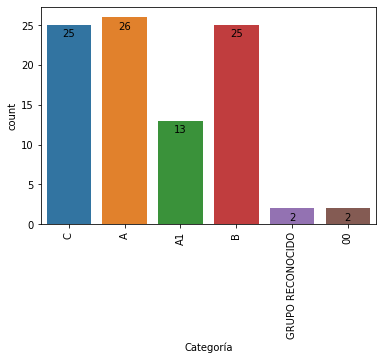

In [5]:
graph = sns.countplot(x=df['Categoría'])
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height - 1.5,height ,ha="center")